<div style="text-align: left;">
<table style="width:100%; background-color:transparent;">
  <tr style="background-color:transparent;">
    <td style="background-color:transparent;"><a href="http://www.datascience-paris-saclay.fr">
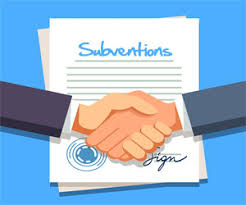 </td>
  </tr>
</table> 
</div>

<center><h1> Analyse des données de subventions  </h1></center>
<br/>
<center> Solène Cochennec, Jaime Costa Centena </center>

## Table of Contents


0. [Introduction](#intro)<br>
1. [Data Analysis](#Data-Prep) <br>

Le but de ce projet est de travailler sur la data visualization des subventions accordées aux associations par la ville de Paris. Pour ce faire, nous travaillerons sur les données disponibles sur le site https://opendata.paris.fr,, avec un jeu de donnée de subventions acceptées et refusées.



### Télécharger les données  

Link to the date: https://opendata.paris.fr/explore/dataset/subventions-accordees-et-refusees/export/?disjunctive.collectivite&disjunctive.nom_beneficiaire&disjunctive.direction&disjunctive.secteurs_d_activites_definies_par_l_association

#### Quelques détails sur le dataset
Ne sont pas retracées les subventions des organismes non associatifs (SCOP, SCIC, fondation de coopération scientifique, sociétés d’économie mixte, établissements publics, etc), ni les aides financières imputées sur des lignes budgétaires autres que les subventions (participations, adhésions, cotisations, etc). Les contributions non financières (locaux, mise à disposition de terrains, de personnels, de panneaux d’information, de matériel, etc) n’y sont pas incluses.




#### Variables 

Le dataset est composé de 10 variables : 
- $\textbf{Année budgétaire}$ (`annee_vote`): année du vote de la subvention, qui ne correspond pas nécessairement à l’année de l’imputation budgétaire ou à l’année du versement réel de la subvention.
- $\textbf{Collectivité}$ (`collectivite`) : Ville ou Département (de 2013 à 2018).
- $\textbf{Nom Bénéficiaire}$ (`nom_beneficiaire`) : nom de l’association effectuant la demande de subvention.
- $\textbf{Numéro Siret}$ (`siret`) : numéro SIRET tel que déclaré par l’association (Le SIREN de la Ville de Paris est le 217 500 016 et celui du Département de Paris le 227 500 055).
- $\textbf{Objet du dossier}$  (`objet`): Intitulé du ou des projets déposés en faveur duquel (desquels) une subvention est sollicitée.
- $\textbf{Montant voté}$ (`montant`) : Montant de la subvention votée  par le Conseil de Paris, sachant que dans certains cas, la Ville de Paris a mutualisé plusieurs projets et accordé une subvention forfaitaire globale qui a été rattachée pour ordre à l’un des projets faute de pouvoir détailler la subvention sur chaque projet précis. L’absence d’un montant chiffré dans la colonne « montant voté » correspond à une demande de subvention défavorablement arbitrée.
- $\textbf{Direction}$ (`direction`): direction de la ville pilotant la demande de subvention (voir ci-après pour la signification des sigles des différentes directions), sachant que dans certains cas, plusieurs directions peuvent co-financer le même projet.
- $\textbf{Nature de la subvention}$ (`type_subvention`) : 
    - Investissement : finance les biens durables et les travaux qui constituent le patrimoine de l’association.
    - Fonctionnement :
        - Pour le fonctionnement annuel de l’association.
        - Pour le financement du ou des projet.s conduits par l’association.
        - Pour le financement d’une action dans le cadre d’un appel à projet de la Ville de Paris (ou du Département de Paris de 2013 à 2018).
        
- $\textbf{Secteur d'activité}$ (`activite_association`): secteur(s) choisi(s) par les associations au moment de son inscription dans le service numérique Paris Asso, dans la limite de 3


Les différentes directions de la ville de Paris sont détaillées sur le lien suivant : https://opendata.paris.fr/explore/dataset/subventions-accordees-et-refusees/information/?disjunctive.collectivite&disjunctive.nom_beneficiaire&disjunctive.direction&disjunctive.secteurs_d_activites_definies_par_l_association

### Recupérer les données 

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import unidecode
from collections import Counter

In [2]:
from data_cleaning import preparation_data

In [3]:
path = 'Data/'

df_subventions = preparation_data(path)

In [4]:
df_subventions.head()

id  annee_vote    collectivite  \
0  2017_04920        2017  Ville de Paris   
1  2016_08398        2017  Ville de Paris   
2  2017_07855        2017  Ville de Paris   
3  2017_05731        2017  Ville de Paris   
4  2017_04795        2017  Ville de Paris   

                        nom_beneficiaire           siret  \
0                           MULTI'COLORS  45355810800016   
1                      MULTI-DECOUVERTES  81396408700015   
2  MUSÉE D'ART ET D'HISTOIRE DU JUDAÏSME  34843510800017   
3                       MUSICA ANDALUCIA  48223420000020   
4         MUSIQUES ET CULTURES DIGITALES  49313113000020   

                                               objet  montant direction  \
0  aap pvi LIEN SOCIAL au Refuge urbain python: "...     2000      DEVE   
1                            démarrage de l'activité      800       DJS   
2  Subvention d'investissement : mise en place d'...    50000       DAC   
3                   TAP 2017 Atelier Théâtre musical     4950     DASCO   
4               Ateliers "EnReportagePermanent" 2017        0      DDCT   

  type_subvention                            activite_association  
0          Projet  Culture & Arts;Environnement & écologie;Social  
1  Fonctionnement                    Culture & Arts;Loisirs;Sport  
2  Investissement    Culture & Arts;Education & formation;Mémoire  
3  Fonctionnement                                  Culture & Arts  
4    Non précisée    Communication & média;Culture & Arts;Mémoire

In [5]:
df_subventions.shape

(59584, 10)

In [6]:
df_subventions.isna().sum() / df_subventions.shape[0]

id                      0.000000
annee_vote              0.000000
collectivite            0.000000
nom_beneficiaire        0.000352
siret                   0.002652
objet                   0.000000
montant                 0.000000
direction               0.000000
type_subvention         0.000000
activite_association    0.000503
dtype: float64

In [7]:
df_subventions.dtypes

id                      object
annee_vote               int64
collectivite            object
nom_beneficiaire        object
siret                   object
objet                   object
montant                  int64
direction               object
type_subvention         object
activite_association    object
dtype: object

### Dummies pour les activités

Transformation de la variable activite_association: Chaque association peut déclarer 1 à 3 type d'activité, et celles-ci sont regroupées dans activite_association. On crée des dummies pour chaque activite existante pour faciliter l'exploitation de cette variable.

In [8]:
# drop rows with no activite_association
float_activities_to_drop = np.where([type(x) == float for x in df_subventions['activite_association']])
df_subventions = df_subventions.drop(float_activities_to_drop[0], axis=0)

In [9]:
#find all possible activities
df_activities = df_subventions['activite_association'].str.split(pat=";", expand=True)
                                                                 
list_activities = []
for i in range(2):
    list_activities += list(df_activities.loc[:,i].unique())
                                                                 
# unique values
list_activities = list(set(list_activities))
list_activities.remove(None)

In [10]:
# names of the dummies
activities_colnames = [x.lower() for x in list_activities]
activities_colnames = [unidecode.unidecode(x) for x in activities_colnames]
activities_colnames = [x.replace(' & ', '_') for x in activities_colnames]
activities_colnames = [x.replace(' ', '_') for x in activities_colnames]
activities_colnames = ['act_' + x for x in activities_colnames]

In [11]:
# create a dummy for one activity
def get_dummy_activite(activite):
    act = [int(activite in x) for x in list(df_subventions['activite_association'].str.split(pat=";"))]
    return act

In [12]:
# add dummies for all possible activities\n",
for i in range(len(list_activities)):
    df_subventions[activities_colnames[i]] = get_dummy_activite(list_activities[i])

In [13]:
df_subventions.columns

Index(['id', 'annee_vote', 'collectivite', 'nom_beneficiaire', 'siret',
       'objet', 'montant', 'direction', 'type_subvention',
       'activite_association', 'act_economie', 'act_sport', 'act_memoire',
       'act_defense_des_droits_et_des_interets', 'act_aides_aux_associations',
       'act_loisirs', 'act_humanitaire', 'act_communication_media',
       'act_emploi', 'act_architecture_urbanisme', 'act_social',
       'act_vie_et_animation_locale', 'act_relations_internationales',
       'act_deplacements_et_transports', 'act_education_formation',
       'act_precarite_exclusion', 'act_idee_opinion', 'act_tourisme',
       'act_sante', 'act_environnement_ecologie', 'act_technique_recherche',
       'act_culture_arts'],
      dtype='object')

 # analyse générale

In [14]:
import plotly.express as px
import plotly

In [15]:
df = df_subventions

In [16]:
df = df.dropna()

In [17]:
# df_culture_arts=df_subventions[df_subventions['activite_association'].str.contains("Culture & Arts")]

In [18]:
df = df[df.montant>0]

In [19]:
montants_par_an = df.groupby(['annee_vote','nom_beneficiaire','type_subvention'])[['montant']].sum().reset_index()

In [20]:
montants_par_an

annee_vote                                   nom_beneficiaire  \
0            2013                                      "JE.TU.IL..."   
1            2013                                "L'EAU EST LE PONT"   
2            2013  "LE FIL D'ARIANE FRANCE" PREVENTION ET SOUTIEN...   
3            2013                              "LES SOULIERS ROUGES"   
4            2013                          "MAISON DE SAGESSE" (MDS)   
...           ...                                                ...   
22361        2019                                            À VENIR   
22362        2019                                ÉCRIRE UN MOUVEMENT   
22363        2019                               ÉDITIONS EXTENSIBLES   
22364        2019                                 ÉLAN INTERCULTUREL   
22365        2019                                    ÉTONNANT CINÉMA   

      type_subvention  montant  
0              Projet   110000  
1      Fonctionnement     1500  
2      Fonctionnement    10200  
3        Non précisée     3900  
4              Projet      750  
...               ...      ...  
22361          Projet     3500  
22362          Projet     3000  
22363          Projet     4000  
22364          Projet     6000  
22365          Projet     5000  

[22366 rows x 4 columns]

In [22]:
df = px.data.iris()
fig = px.scatter(montants_par_an, x="annee_vote", y="montant", color="type_subvention",
                 size='montant', hover_data=['nom_beneficiaire'])
fig.update_layout(
    title="Montant des subventions par an et type de subvention",
    xaxis_title="Année de vote",
    yaxis_title="Montant")
fig.show()

In [23]:
 plotly.offline.plot(fig, filename='website/montant_par_an.html')

'website/montant_par_an.html'